In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

In [2]:
# Generate a synthetic ECG signal
fs = 360  # Sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # 10 seconds of data
ecg = np.sin(2 * np.pi * 1.2 * np.sqrt(t)) * (np.sin(2 * np.pi * 3 * t))  # Synthetic ECG signal

In [3]:
# Add Gaussian noise
np.random.seed(42)
noise = np.random.normal(0, 0.5, t.shape)
noisy_ecg = ecg + noise

In [4]:
# FIR Filter Design
numtaps = 101  # Number of filter coefficients (filter order + 1)
cutoff = 50  # Cutoff frequency (Hz)
fir_coeff = signal.firwin(numtaps, cutoff, fs=fs)
filtered_ecg_fir = signal.lfilter(fir_coeff, 1.0, noisy_ecg)

In [5]:
# FFT-Based Filtering
ecg_fft = np.fft.fft(noisy_ecg)
frequencies = np.fft.fftfreq(len(t), 1/fs)
filter_mask = np.abs(frequencies) < cutoff
filtered_fft = ecg_fft * filter_mask
filtered_ecg_fft = np.fft.ifft(filtered_fft).real

In [6]:
# SNR Calculation
def calculate_snr(signal, noise):
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    return 10 * np.log10(signal_power / noise_power)

snr_original = calculate_snr(ecg, noise)
snr_fir = calculate_snr(filtered_ecg_fir, ecg - filtered_ecg_fir)
snr_fft = calculate_snr(filtered_ecg_fft, ecg - filtered_ecg_fft)



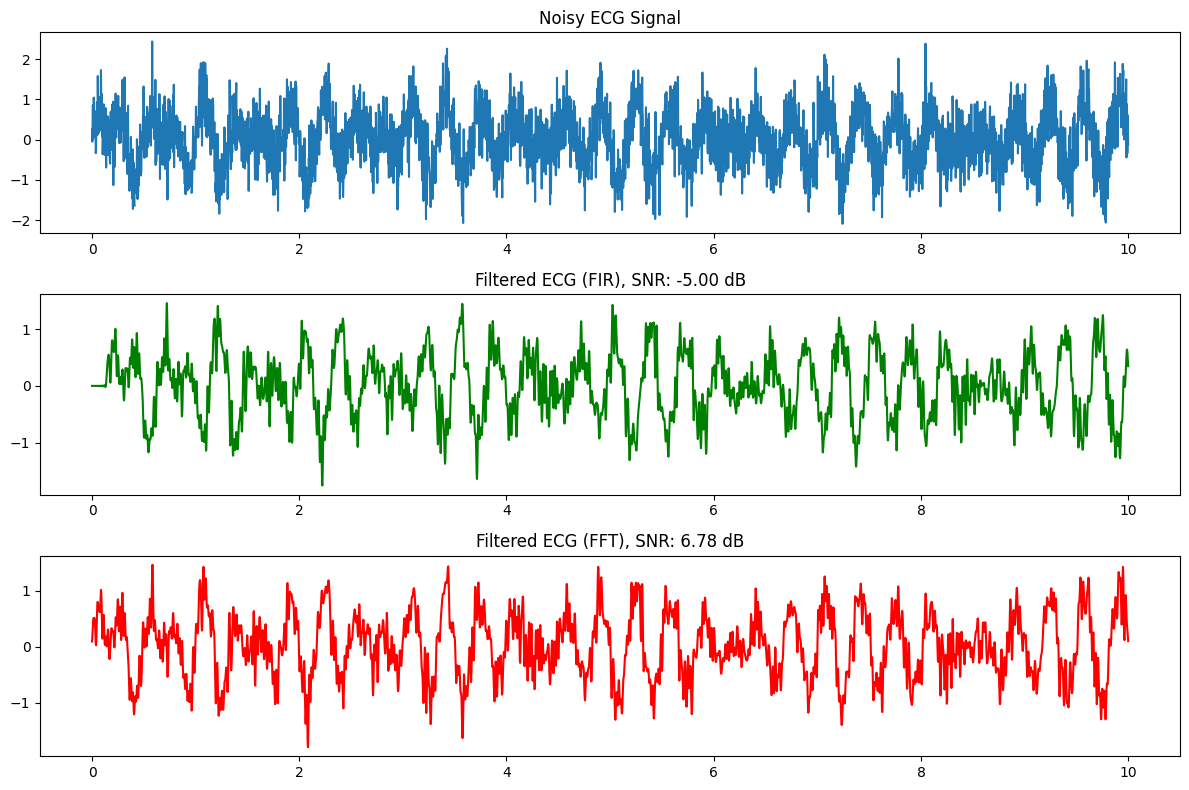

In [7]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, noisy_ecg, label='Noisy ECG')
plt.title('Noisy ECG Signal')
plt.subplot(3, 1, 2)
plt.plot(t, filtered_ecg_fir, label='Filtered ECG (FIR)', color='green')
plt.title(f'Filtered ECG (FIR), SNR: {snr_fir:.2f} dB')
plt.subplot(3, 1, 3)
plt.plot(t, filtered_ecg_fft, label='Filtered ECG (FFT)', color='red')
plt.title(f'Filtered ECG (FFT), SNR: {snr_fft:.2f} dB')
plt.tight_layout()
plt.show()



In [8]:
# Print SNR Results
print(f"Original SNR: {snr_original:.2f} dB")
print(f"FIR Filter SNR: {snr_fir:.2f} dB")
print(f"FFT Filter SNR: {snr_fft:.2f} dB")


Original SNR: 0.13 dB
FIR Filter SNR: -5.00 dB
FFT Filter SNR: 6.78 dB
